### children 개념 실습
* 현재 레벨(body)을 기준으로 한단계 안쪽인 요소(p)를 가져옴 / 줄바꿈도 포함

In [9]:
from bs4 import BeautifulSoup

In [2]:
html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

In [5]:
soup = BeautifulSoup(html, 'lxml')

list(soup.children)

[<html>
 <head><title> test site </title></head>
 <body><p align="left" class="class1">test3</p>
 <p class="class1">test2</p>
 <p id="p1">오늘의 주가지수 1500</p>
 <span class="class3">span tag text</span>
 <p class="class4">test3</p>
 </body></html>,
 '\n']

In [8]:
list(soup.body.children) 

[<p align="left" class="class1">test3</p>,
 '\n',
 <p class="class1">test2</p>,
 '\n',
 <p id="p1">오늘의 주가지수 1500</p>,
 '\n',
 <span class="class3">span tag text</span>,
 '\n',
 <p class="class4">test3</p>,
 '\n']

## 네이버 영화 리뷰 가져오기
*홈페이지 url 뒤에 robots.txt를 붙이면 크롤링시 금지되는 권고 사항 볼 수 있음.

In [13]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after"
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="

In [15]:
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")
comment_all = soup.find_all('td', class_='title')
comment_all

[<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:60%">별점 - 총 10점 중</span></span><em>6</em>
 </div>
 <br/>곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('chac****', 'WMZMuhycSOJHo075MvmRyixwLVH5/Ld5CnAM/k8lAwE=', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '17551922', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
 </td>,
 <td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>
 <br/>이게 예술이 아니면 뭔가요? 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('froz****', '9J2MCiPFUGAUP+JXzM4laPXLO74ebkCmml5UuUL3g/g=', '이게 예술이 아니면 뭔가요?', '17550850', 'point_after');" style="color:#8

In [16]:
print(len( comment_all ))

10


#### 리뷰 중에 특정 댓글 '이게 진짜 현대예술이지' 를 뽑아오려면

In [18]:
print(comment_all[9].prettify())

<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">
  스파이더맨: 뉴 유니버스
 </a>
 <div class="list_netizen_score">
  <span class="st_off">
   <span class="st_on" style="width:100%">
    별점 - 총 10점 중
   </span>
  </span>
  <em>
   10
  </em>
 </div>
 <br/>
 이게 진짜 현대예술이지
 <a class="report" href="#" onclick="report('aekq****', 'sONzlEbpz2kblATHPaC6MOwqLPekaTSziVhRlLCUz/E=', '이게 진짜 현대예술이지', '17516944', 'point_after');" style="color:#8F8F8F" title="새 창">
  신고
 </a>
</td>



In [21]:
list(comment_all[9].children)

['\n',
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>,
 '\n',
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>,
 '\n',
 <br/>,
 '이게 진짜 현대예술이지 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t',
 <a class="report" href="#" onclick="report('aekq****', 'sONzlEbpz2kblATHPaC6MOwqLPekaTSziVhRlLCUz/E=', '이게 진짜 현대예술이지', '17516944', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>,
 '\n']

In [23]:
list(comment_all[9].children)[6]

'이게 진짜 현대예술이지 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t'

In [30]:
temp = list(comment_all[5].children)[6]  #응용
temp

'스파이더맨 판권을 소니가 가져야 하는 이유 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t'

#### * 문자열.strip() : \n,\t를 없애주는 처리 역할을 한다.

In [25]:
temp = list(comment_all[5].children)[6].strip()
temp

'스파이더맨 판권을 소니가 가져야 하는 이유'

#### 결과) 1페이지 전체 리뷰 가져오기

In [28]:
comments = []
for one in comment_all:
    one_com = list(one.children)[6].strip()
    #print(one_com)
    comments.append(one_com)
    
comments

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ',
 '이게 예술이 아니면 뭔가요?',
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음',
 '명대사:헤이',
 '진짜 고퀄리티다....',
 '스파이더맨 판권을 소니가 가져야 하는 이유',
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?',
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ',
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!',
 '이게 진짜 현대예술이지']

#### 방법1)  .find("br").next_sibling.strip()

#### 방법 2) a태그로 찾기

In [49]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
sentence = soup.findAll('td', class_='title')
for idx, comment in enumerate(sentence):
    list_comment = comment.findAll('a')
    print(list_comment[1].get('onclick').split(',')[2])

 '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'
 '이게 예술이 아니면 뭔가요?'
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'
 '명대사:헤이'
 '진짜 고퀄리티다.... '
 '스파이더맨 판권을 소니가 가져야 하는 이유'
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?'
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ'
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!'
 '이게 진짜 현대예술이지'


In [33]:
import time

In [40]:
comments = []
cnt = 0

for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    
    comment_all = soup.find_all('td', class_="title")
    
    for comment in comment_all:
        temp= list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            print("len<5 case :",cnt)
            continue
        else:
            try:
                cnt= cnt + 1
                result = temp[6].strip()
                comments.append(result)
            except:
                cnt= cnt + 1
                print("len>=5 case ",cnt)
                print(temp)
    
    print(comments)
    print()
    
    time.sleep(3)
    
print(len(comments))
print(comments)

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지']

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지', '스파이더맨 작품들 중에 최고.', '스파이더맨 뉴 유니버스.', '영화의 색감이 너무 좋다 눈이 즐거운 영화!', '', '애니메이션 자체로도 훌륭하지만, 전달하려는 메세지와 전달하는 방식도 매우 뛰어나다.', '마블에서 만든 실사판보다 더 괜찮음 스파이더맨 특유의 설정때문에 애니메이션이 더 잘 맞는듯', '존잼 3번이나 봄 ♡♡♡♡', '꼭보셈 어벤져스보다 재밌음', 

70
['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지', '스파이더맨 작품들 중에 최고.', '스파이더맨 뉴 유니버스.', '영화의 색감이 너무 좋다 눈이 즐거운 영화!', '', '애니메이션 자체로도 훌륭하지만, 전달하려는 메세지와 전달하는 방식도 매우 뛰어나다.', '마블에서 만든 실사판보다 더 괜찮음 스파이더맨 특유의 설정때문에 애니메이션이 더 잘 맞는듯', '존잼 3번이나 봄 ♡♡♡♡', '꼭보셈 어벤져스보다 재밌음', '진짜 잘 만들었음. 영상미가 좋음.', '내가 스파이더맨 좋아하고 좀 안다 하시는분들은 더 재밋게 볼거같아요ㅋㅋㅋ 너무 재밌었음', '생각한거 보대는 재밌다킬링타임용으로는 훌륭함', '전반적으로 좋으나 후반부가 너무 일본스러운 아기자기한 판타지 세계가 나와 고개를 돌리게 된다.', '원작 코믹스를 그대로 옮겨놓은 듯한 영상,연출이 너무 신선하고 재미있었다.꼭 보시길 추천한다.', '득특하고 창의적인 완벽한 스파이더맨 영화!', '', '개인적으루 ost ㄹㅇ 미쳤음. 넘 좋당.', '그냥 미쳤음 모든게 새롭다', '애니메이션으로는 볼만 했음. 다만 실사 유니버스와는 별도로 계속 나왔으면 한다.', '스파이더맨으로 더 이상 뽑아 낼게 있나 싶었는데, 깜놀했음ㅎ 진짜 잘 만들었다. 신선해~~!',

In [48]:
comments_allpage = []
cnt = 0

for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    comment_all = soup.find_all('td', class_='title')
    #comments = []
    
    for one in comment_all:
        one_com = list(one.children)[6].strip() #하나의 댓글
        #comments.append(one_com)
        comments_allpage.append(one_com) #전체에 하나 댓글 추가
    
    time.sleep(3)
    
print(len(comments_allpage))
# print(len(comments_allpage))

70


In [44]:
import pandas as pd
import os

In [47]:
dict_doc = {"text":comments_allpage}
doc = pd.DataFrame(dict_doc)
doc.to_csv("스파이더맨리뷰.csv", index=False)

os.listdir(os.getcwd())

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 '0614_class_comment.html',
 '0614_class_CSS 실습.html',
 '0614_class_CSS.css',
 '0614_class_CSS.html',
 '0614_class_heading.html',
 '0614_class_id.html',
 '0614_class_list.html',
 '0614_class_table.html',
 '0616 자율과제_류지인.ipynb',
 '210616 BeautifulSoup.ipynb',
 '210617 네이버 댓글 추출.ipynb',
 '210617 네이버 주식 정보.ipynb',
 'data',
 'html1.html',
 'README.md',
 '스파이더맨리뷰.csv',
 '해변.jpg',
 '회사명과웹사이트.csv']

## 워드 클라우드 시각화

In [50]:
from wordcloud import WordCloud

import numpy as np
from PIL import Image

In [55]:
f = open("210616_스파이더맨리뷰.csv", encoding="utf-8")
text = f.read()
f.close()

In [52]:
from matplotlib import rc
rc("font", family="NanumGothic")

(-0.5, 399.5, 199.5, -0.5)

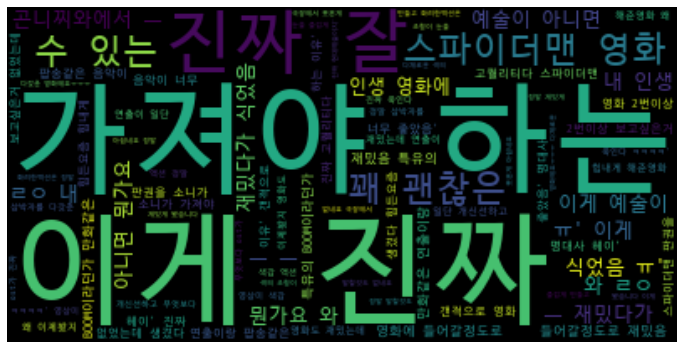

In [56]:
wcloud = WordCloud('./data/D2Coding.ttf',
                  max_words=1000,
                  relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")